In [1]:
import geopandas as gpd
import csv
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd 

warnings. filterwarnings('ignore')

In [2]:
census = gpd.read_file('data/nz_census/2018-census-individual-part-1-total-new-zealand-by-statistic.shp')
regions = gpd.read_file('data/boundaries/regional_boundaries/REGC2017_HD_Clipped.shp')

In [3]:

northland  = regions.iloc[0,4]
auckland =regions.iloc[1,4]
waikato = regions.iloc[2,4]
bop = regions.iloc[3,4]
gisborne = regions.iloc[4,4]
hawkesbay = regions.iloc[5,4]
taranaki = regions.iloc[6,4]
manawatu_wanganui = regions.iloc[7,4]
wellington = regions.iloc[8,4]
west_coast = regions.iloc[9,4]
canterbury = regions.iloc[10,4]
otago = regions.iloc[11,4]
southland = regions.iloc[12,4]
tasman = regions.iloc[13,4]
nelson = regions.iloc[14,4]
marlborough = regions.iloc[15,4]


In [4]:
otago_total_pop = gpd.clip(census,otago)
southland_total_pop = gpd.clip(census,southland)

northland_total_pop = gpd.clip(census,northland)
auckland_total_pop = gpd.clip(census,auckland)

waikato_total_pop = gpd.clip(census,waikato)
bop_total_pop = gpd.clip(census,bop)

gisborne_total_pop = gpd.clip(census,gisborne)
hawkesbay_total_pop = gpd.clip(census,hawkesbay)

taranaki_total_pop = gpd.clip(census,taranaki)
wellington_total_pop = gpd.clip(census,wellington)

canterbury_total_pop = gpd.clip(census,canterbury)
tasman_total_pop = gpd.clip(census,tasman)

nelson_total_pop = gpd.clip(census,nelson)
marlborough_total_pop = gpd.clip(census,marlborough)

In [5]:
horizons = regions.iloc[7,4]
horizons_total_pop = gpd.clip(census,horizons)

In [6]:
horizons_total_pop

,SA12018_V1,C06_CURPop,C13_CURPop,C18_CURPop,C06_CNPop,C13_CNPop,C18_CNPop,C18_UnitRe,C18_Unit_1,C18_Unit_2,...,C18_Maor_2,C18_Maor_3,C18_Maor_4,C18_Maor_5,LANDWATER,LANDWATER_,LAND_AREA_,AREA_SQ_KM,SHAPE_Leng,geometry
411,7013263,117,129,138,111,126,138,117,9,15,...,3,138,0,138,12,Mainland,127.851096,127.851096,73169.441437,"MULTILINESTRING ((1827993.004 5735877.846, 182..."
416,7013297,180,93,87,252,90,72,45,6,36,...,0,87,0,87,12,Mainland,202.647414,202.647414,122655.054696,GEOMETRYCOLLECTION (POINT (1827736.739 5674722...
424,7013476,57,6,180,129,57,357,153,0,27,...,9,180,0,180,12,Mainland,1342.173709,1342.173709,274923.969246,GEOMETRYCOLLECTION (POINT (1855482.982 5658529...
566,7016711,174,174,159,168,168,159,150,3,9,...,9,159,0,159,12,Mainland,79.765555,79.765555,62551.335970,GEOMETRYCOLLECTION (LINESTRING (1882890.747 55...
569,7016746,99,96,99,93,99,93,87,0,9,...,3,99,0,99,12,Mainland,163.760285,163.760285,81967.686143,GEOMETRYCOLLECTION (POINT (1886233.309 5526982...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21929,7022351,213,219,228,318,258,216,204,6,15,...,9,228,0,228,12,Mainland,290.300512,290.300512,116312.283861,GEOMETRYCOLLECTION (POINT (1804764.606 5486676...
22501,7022183,162,195,222,180,192,246,201,3,18,...,3,222,0,222,12,Mainland,193.170111,193.170111,74317.720283,GEOMETRYCOLLECTION (POINT (1805852.783 5486727...
22502,7022184,141,141,147,144,141,141,129,6,15,...,9,147,0,147,12,Mainland,61.811242,61.811242,61830.502378,GEOMETRYCOLLECTION (LINESTRING (1818387.635 54...
22766,7022497,0,0,0,0,0,0,-999,-999,-999,...,-999,-999,-999,0,23,Oceanic,0.000000,7252.263590,690090.915701,POINT (1907314.985 5518430.632)


In [7]:
'''percent exposed per region'''

rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 


regional_tot_pop_list = [northland_total_pop, auckland_total_pop,waikato_total_pop, bop_total_pop, gisborne_total_pop, hawkesbay_total_pop, taranaki_total_pop ,wellington_total_pop, canterbury_total_pop, otago_total_pop,southland_total_pop,  tasman_total_pop, nelson_total_pop, marlborough_total_pop, horizons_total_pop]


eslr_list = []
regional_percent_list = []

for rc in range(0,15,1):
        regional_name = rc_names[rc]
        regional_name_l = rc_names_l[rc]
        tot_region_pop = regional_tot_pop_list[rc]
        percent_exposed_y = []
        eslr_x = []
        
        for eslr in range(0,160,10):
            
            slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_l + '_aep1pct_{}.shp'.format(eslr))
            slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
            population_slr = slr_data['C18_CURPop'].sum()
            total_region_pop = tot_region_pop['C18_CURPop'].sum()
            
            one_percent = (total_region_pop/100)
            percent_exposed_to_slr = population_slr/one_percent
            percent_exposed_to_slr = round(percent_exposed_to_slr, 2)
            percent_exposed_y.append(percent_exposed_to_slr)
            eslr_x.append(eslr)
            
            print('At a sea level rise of ' + str(eslr)+ 'cm, ' + str(percent_exposed_to_slr) + ' % of the total population are exposed in ' + str(rc_names[rc]))
        eslr_list.append(eslr_x)
        regional_percent_list.append(percent_exposed_y)

fig = plt.figure()
ax = plt.axes()
sns.set_palette(sns.color_palette("Set3"))
for i in range(len(rc_names)):
    plt.plot(eslr_list[i], regional_percent_list[i],  linestyle='-', label=rc_names[i])
    plt.annotate(rc_names[i], (150, regional_percent_list[i]), textcoords="offset points", xytext=(40,5), fontsize=11, ha='center', color='c')
ax.set_xlabel('Sea level rise in cm')
ax.set_ylabel('Percent of people exposed by region')
ax.set_title('Percent of people exposed for SLR in New Zealand by region')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()       



At a sea level rise of 0cm, 24.57 % of the total population are exposed in Northland
At a sea level rise of 10cm, 24.79 % of the total population are exposed in Northland
At a sea level rise of 20cm, 24.79 % of the total population are exposed in Northland
At a sea level rise of 30cm, 25.05 % of the total population are exposed in Northland
At a sea level rise of 40cm, 25.13 % of the total population are exposed in Northland
At a sea level rise of 50cm, 25.31 % of the total population are exposed in Northland
At a sea level rise of 60cm, 25.42 % of the total population are exposed in Northland
At a sea level rise of 70cm, 25.5 % of the total population are exposed in Northland
At a sea level rise of 80cm, 25.5 % of the total population are exposed in Northland
At a sea level rise of 90cm, 25.65 % of the total population are exposed in Northland
At a sea level rise of 100cm, 26.34 % of the total population are exposed in Northland
At a sea level rise of 110cm, 26.55 % of the total popul

At a sea level rise of 20cm, 14.36 % of the total population are exposed in Taranaki
At a sea level rise of 30cm, 14.6 % of the total population are exposed in Taranaki
At a sea level rise of 40cm, 14.6 % of the total population are exposed in Taranaki
At a sea level rise of 50cm, 14.71 % of the total population are exposed in Taranaki
At a sea level rise of 60cm, 14.83 % of the total population are exposed in Taranaki
At a sea level rise of 70cm, 14.96 % of the total population are exposed in Taranaki
At a sea level rise of 80cm, 14.96 % of the total population are exposed in Taranaki
At a sea level rise of 90cm, 15.07 % of the total population are exposed in Taranaki
At a sea level rise of 100cm, 15.4 % of the total population are exposed in Taranaki
At a sea level rise of 110cm, 15.67 % of the total population are exposed in Taranaki
At a sea level rise of 120cm, 15.67 % of the total population are exposed in Taranaki
At a sea level rise of 130cm, 15.67 % of the total population are

At a sea level rise of 30cm, 16.27 % of the total population are exposed in Nelson
At a sea level rise of 40cm, 18.85 % of the total population are exposed in Nelson
At a sea level rise of 50cm, 19.06 % of the total population are exposed in Nelson
At a sea level rise of 60cm, 19.3 % of the total population are exposed in Nelson
At a sea level rise of 70cm, 19.82 % of the total population are exposed in Nelson
At a sea level rise of 80cm, 20.61 % of the total population are exposed in Nelson
At a sea level rise of 90cm, 21.92 % of the total population are exposed in Nelson
At a sea level rise of 100cm, 21.92 % of the total population are exposed in Nelson
At a sea level rise of 110cm, 23.87 % of the total population are exposed in Nelson
At a sea level rise of 120cm, 24.54 % of the total population are exposed in Nelson
At a sea level rise of 130cm, 24.93 % of the total population are exposed in Nelson
At a sea level rise of 140cm, 25.2 % of the total population are exposed in Nelson
A

TypeError: float() argument must be a string or a number, not 'list'

<Figure size 432x288 with 1 Axes>

ValueError: too many values to unpack (expected 2)

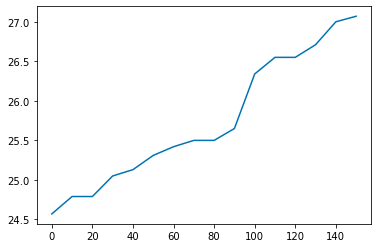

In [25]:

fig = plt.figure()
ax = plt.axes()
sns.set_palette(sns.color_palette("Set3"))
for i in range(len(rc_names)):
    plt.plot(eslr_list[i], regional_percent_list[i],  linestyle='-', label=rc_names[i])
    plt.annotate(rc_names[i], regional_percent_list[i])

ax.set_xlabel('Sea level rise in cm')
ax.set_ylabel('Percent of people exposed by region')
ax.set_title('Percent of people exposed for SLR in New Zealand by region')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()       


In [ ]:
rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 


regional_tot_pop_list = [northland_total_pop, auckland_total_pop,waikato_total_pop, bop_total_pop, gisborne_total_pop, hawkesbay_total_pop, taranaki_total_pop ,wellington_total_pop, canterbury_total_pop, otago_total_pop,southland_total_pop,  tasman_total_pop, nelson_total_pop, marlborough_total_pop, horizons_total_pop]


regional_tot_pop_list = [northland_total_pop]
for rc in range(0, len(regional_tot_pop_list)):
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    
    tot_pop=regional_tot_pop_list[rc]
    tot_pop =tot_pop.replace(['C', -999, -998, '0', '..', 'Mainland'], 0)
    tot_pop = tot_pop['C18_CURPop'].sum()
    
    percent_exposed = []
    
    for eslr in range(0,160,10):
        slr = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_l + '_aep1pct_{}.shp'.format(eslr))
        slr = slr.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
        pop_exposed = slr['C18_CURPop'].sum()         

        percent_exposed_to_slr = (pop_exposed/tot_pop)*100
        percent_exposed_to_slr = round(percent_exposed_to_slr, 2)
        percent_exposed.append(percent_exposed_to_slr)
       
    rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean = rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    rcp2_exp = []
    rcp8_exp = []

    
        
    mean = [0.07,0.12,0.17,0.23,0.29,0.35,0.41,0.47,0.53,0.59,0.64]
    std_upper = [0.02105,0.0417,0.0625,0.0833,0.104,0.125,0.1458,0.167,0.1875,0.208,0.21875]

    nsim = 1000
    rcp2_lower = []
    rcp2_upper = []

    for num in range(len(mean)):
        mu = mean[num]
        std = std_upper[num]
        slr = [] 
        for i in range(nsim): 
            x = np.random.normal(mu,std)
            slr.append(x) 

        mean_slr = np.mean(slr)
        slr_lower = np.percentile(slr,5)
        slr_upper = np.percentile(slr,95)
        rcp2_lower.append(slr_lower *10)
        rcp2_upper.append(slr_upper*10)

   


    
    mean8 = [0.08,0.13,0.19,0.26,0.34,0.42,0.52,0.61,0.75,0.88,1]
    std_upper8 = [0.03158,0.042,0.063,0.0947,0.1158,0.147,0.1789,0.21,0.263,0.305,0.347]
    nsim = 1000
    rcp8_lower = []
    rcp8_upper = []

    for num in range(len(mean8)):
        mu = mean8[num]
        std = std_upper8[num]
        slr = [] 
        for i in range(nsim):
            x = np.random.normal(mu,std)
            slr.ap`pend(x) 

        mean_slr = np.mean(slr)
        slr_lower = np.percentile(slr,5)
        slr_upper = np.percentile(slr,95)
        rcp8_lower.append(slr_lower *10)
        rcp8_upper.append(slr_upper*10)

    rcp8_lowexp = []
    rcp8_upexp = []
    rcp2_lowexp = []
    rcp2_upexp = []

    for count in range(len(year)):
        rcp2_lowexp.append(percent_exposed[int(round(rcp2_lower[count]))])
        rcp2_upexp.append(percent_exposed[int(round(rcp2_upper[count]))])
        rcp8_lowexp.append(percent_exposed[int(round(rcp8_lower[count]))])
        rcp8_upexp.append(percent_exposed[int(round(rcp8_upper[count]))])
        

    plt.figure()
    plt.plot(year, rcp2_exp, label="RCP 2.6", color = 'violet')
    plt.plot(year, rcp8_exp, label="RCP 8", color= 'lightblue')
    plt.fill_between(year,rcp2_lowexp,rcp2_upexp, facecolor='violet', alpha=0.2)
    plt.fill_between(year,rcp8_lowexp,rcp8_upexp, facecolor='lightblue', alpha=0.2)
    plt.title('Percent of people exposed in ' + rc_names[rc] + ' over time with different RCPs')
    plt.xlabel("Years")
    plt.ylabel("Percent")
    plt.legend(loc= 'upper left')
    plt.savefig('report/percent_ppl_exposed_in ' +rc_names[rc]+ '.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()

In [ ]:

rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 


regional_tot_pop_list = [northland_total_pop, auckland_total_pop,waikato_total_pop, bop_total_pop, gisborne_total_pop, hawkesbay_total_pop, taranaki_total_pop ,wellington_total_pop, canterbury_total_pop, otago_total_pop,southland_total_pop,  tasman_total_pop, nelson_total_pop, marlborough_total_pop, horizons_total_pop]
for rc in range(0,15,1):
    tot_pop=regional_tot_pop_list[rc]
    tot_pop =tot_pop.replace(['C', -999, -998, '0', '..', 'Mainland'], 0)
    
    total_region_pop_ages_1_to_14 = tot_pop['C18_Agelif'].sum()
    total_region_pop_ages_15_to_29 = tot_pop['C18_Agel_1'].sum()
    total_region_pop_ages_30_to_64 = tot_pop['C18_Agel_2'].sum()
    total_region_pop_ages_65_and_over = tot_pop['C18_Agel_3'].sum()
    
    print(total_region_pop_ages_1_to_14)
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    percent_exposed_ages_1_to_14 = []
    percent_exposed_ages_15_to_29 = []
    percent_exposed_ages_30_to_64 = []
    percent_exposed_ages_65_and_over = []
    
    for eslr in range(0,160,10):
            
        slr = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_l + '_aep1pct_{}.shp'.format(eslr))
        slr = slr.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
        
        pop_exposed_ages_1_to_14 = slr['C18_Agelif'].sum()
        pop_exposed_ages_15_to_29 = slr['C18_Agel_1'].sum()
        pop_exposed_ages_30_to_64 = slr['C18_Agel_2'].sum()
        pop_exposed_ages_65_and_over = slr['C18_Agel_3'].sum()
        print(pop_exposed_ages_1_to_14)


        percent_exposed_to_slr_ages_1_to_14 = (pop_exposed_ages_1_to_14/total_region_pop_ages_1_to_14)*100
        percent_exposed_to_slr_ages_1_to_14 = round(percent_exposed_to_slr_ages_1_to_14, 2)
        percent_exposed_ages_1_to_14.append(percent_exposed_to_slr_ages_1_to_14)
        
        percent_exposed_to_slr_ages_15_to_29 = (pop_exposed_ages_15_to_29/total_region_pop_ages_15_to_29)*100
        percent_exposed_to_slr_ages_15_to_29 = round(percent_exposed_to_slr_ages_15_to_29, 2)
        percent_exposed_ages_15_to_29.append(percent_exposed_to_slr_ages_15_to_29)

        percent_exposed_to_slr_ages_30_to_64 = (pop_exposed_ages_30_to_64/total_region_pop_ages_30_to_64)*100
        percent_exposed_to_slr_ages_30_to_64 = round(percent_exposed_to_slr_ages_30_to_64, 2)
        percent_exposed_ages_30_to_64.append(percent_exposed_to_slr_ages_30_to_64)
       
                       
        percent_exposed_to_slr_ages_65_and_over = (pop_exposed_ages_65_and_over/total_region_pop_ages_65_and_over) *100
        percent_exposed_to_slr_ages_65_and_over = round(percent_exposed_to_slr_ages_65_and_over, 2)
        percent_exposed_ages_65_and_over.append(percent_exposed_to_slr_ages_65_and_over)

    rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean= rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    
    rcp2_exp_ages_1_to_14 = []
    rcp8_exp_ages_1_to_14 = []
    rcp2_exp_ages_15_to_29 = []
    rcp8_exp_ages_15_to_29 = []
    rcp2_exp_ages_30_to_64 = []
    rcp8_exp_ages_30_to_64 = []
    rcp2_exp_ages_65_and_over = []
    rcp8_exp_ages_65_and_over = []


    for count in range(0,len(year)):
        rcp2_exp_ages_1_to_14.append(percent_exposed_ages_1_to_14[int(rcp2mean[count])])
        rcp8_exp_ages_1_to_14.append(percent_exposed_ages_1_to_14[int(rcp8mean[count])])
        rcp2_exp_ages_15_to_29.append(percent_exposed_ages_15_to_29[int(rcp2mean[count])])
        rcp8_exp_ages_15_to_29.append(percent_exposed_ages_15_to_29[int(rcp8mean[count])])
        rcp2_exp_ages_30_to_64.append(percent_exposed_ages_30_to_64[int(rcp2mean[count])])
        rcp8_exp_ages_30_to_64.append(percent_exposed_ages_30_to_64[int(rcp8mean[count])])
        rcp2_exp_ages_65_and_over.append(percent_exposed_ages_65_and_over[int(rcp2mean[count])])
        rcp8_exp_ages_65_and_over.append(percent_exposed_ages_65_and_over[int(rcp8mean[count])])
      

    data_rcp2 = {'1-14 rcp 2':  rcp2_exp_ages_1_to_14, '15-29 rcp 2': rcp2_exp_ages_15_to_29, '30-54 rcp 2':rcp2_exp_ages_30_to_64, '65+ rcp 2':rcp2_exp_ages_65_and_over,
    '1-14 rcp 8':  rcp8_exp_ages_1_to_14, '15-29 rcp 8': rcp8_exp_ages_15_to_29, '30-54 rcp 8':rcp8_exp_ages_30_to_64, '65+ rcp 8':rcp8_exp_ages_65_and_over}
    df= pd.DataFrame(data=data_rcp2)
    df.to_csv('result_tables/exposure table for ages in '+regional_name +'.csv')

  
        
    plt.figure()
    sns.set_palette(sns.color_palette("colorblind"))
    
    plt.plot(year, rcp8_exp_ages_1_to_14, label="ages_1_to_14 - RCP 8")
    plt.plot(year, rcp2_exp_ages_15_to_29, label="ages_15_to_29 - RCP 2.6")
    plt.plot(year, rcp8_exp_ages_15_to_29, label="ages_15_to_29 - RCP 8")
    plt.plot(year, rcp2_exp_ages_30_to_64, label="ages_30_to_64 - RCP 2.6")
    plt.plot(year, rcp8_exp_ages_30_to_64, label="ages_30_to_64 - RCP 8")
    plt.plot(year, rcp2_exp_ages_65_and_over, label="ages_65_and_over - RCP 2.6")
    plt.plot(year, rcp8_exp_ages_65_and_over, label="ages_65_and_over - RCP 8")
  
    
    plt.title('Percent people exposed in ' + rc_names[rc] + ' over time per age groups')
    plt.xlabel("Years")
    plt.ylabel("Percent Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('report/percent ages of_ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()


65424
14469
14760
15306
15510
15756
15837
16191
16209
16263
16500
17187
17826
18480
18960
19272
19470


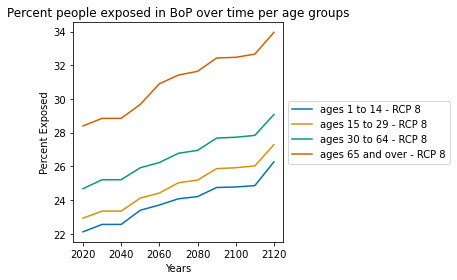

In [17]:

rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 


regional_tot_pop_list = [northland_total_pop, auckland_total_pop,waikato_total_pop, bop_total_pop, gisborne_total_pop, hawkesbay_total_pop, taranaki_total_pop ,wellington_total_pop, canterbury_total_pop, otago_total_pop,southland_total_pop,  tasman_total_pop, nelson_total_pop, marlborough_total_pop, horizons_total_pop]
for rc in range(3,4,1):
    tot_pop=regional_tot_pop_list[rc]
    tot_pop =tot_pop.replace(['C', -999, -998, '0', '..', 'Mainland'], 0)
    
    total_region_pop_ages_1_to_14 = tot_pop['C18_Agelif'].sum()
    total_region_pop_ages_15_to_29 = tot_pop['C18_Agel_1'].sum()
    total_region_pop_ages_30_to_64 = tot_pop['C18_Agel_2'].sum()
    total_region_pop_ages_65_and_over = tot_pop['C18_Agel_3'].sum()
    
    print(total_region_pop_ages_1_to_14)
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    percent_exposed_ages_1_to_14 = []
    percent_exposed_ages_15_to_29 = []
    percent_exposed_ages_30_to_64 = []
    percent_exposed_ages_65_and_over = []
    
    for eslr in range(0,160,10):
            
        slr = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_l + '_aep1pct_{}.shp'.format(eslr))
        slr = slr.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
        
        pop_exposed_ages_1_to_14 = slr['C18_Agelif'].sum()
        pop_exposed_ages_15_to_29 = slr['C18_Agel_1'].sum()
        pop_exposed_ages_30_to_64 = slr['C18_Agel_2'].sum()
        pop_exposed_ages_65_and_over = slr['C18_Agel_3'].sum()
        print(pop_exposed_ages_1_to_14)


        percent_exposed_to_slr_ages_1_to_14 = (pop_exposed_ages_1_to_14/total_region_pop_ages_1_to_14)*100
        percent_exposed_to_slr_ages_1_to_14 = round(percent_exposed_to_slr_ages_1_to_14, 2)
        percent_exposed_ages_1_to_14.append(percent_exposed_to_slr_ages_1_to_14)
        
        percent_exposed_to_slr_ages_15_to_29 = (pop_exposed_ages_15_to_29/total_region_pop_ages_15_to_29)*100
        percent_exposed_to_slr_ages_15_to_29 = round(percent_exposed_to_slr_ages_15_to_29, 2)
        percent_exposed_ages_15_to_29.append(percent_exposed_to_slr_ages_15_to_29)

        percent_exposed_to_slr_ages_30_to_64 = (pop_exposed_ages_30_to_64/total_region_pop_ages_30_to_64)*100
        percent_exposed_to_slr_ages_30_to_64 = round(percent_exposed_to_slr_ages_30_to_64, 2)
        percent_exposed_ages_30_to_64.append(percent_exposed_to_slr_ages_30_to_64)
       
                       
        percent_exposed_to_slr_ages_65_and_over = (pop_exposed_ages_65_and_over/total_region_pop_ages_65_and_over) *100
        percent_exposed_to_slr_ages_65_and_over = round(percent_exposed_to_slr_ages_65_and_over, 2)
        percent_exposed_ages_65_and_over.append(percent_exposed_to_slr_ages_65_and_over)

    rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean= rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    
    rcp2_exp_ages_1_to_14 = []
    rcp8_exp_ages_1_to_14 = []
    rcp2_exp_ages_15_to_29 = []
    rcp8_exp_ages_15_to_29 = []
    rcp2_exp_ages_30_to_64 = []
    rcp8_exp_ages_30_to_64 = []
    rcp2_exp_ages_65_and_over = []
    rcp8_exp_ages_65_and_over = []


    for count in range(0,len(year)):
        rcp2_exp_ages_1_to_14.append(percent_exposed_ages_1_to_14[int(rcp2mean[count])])
        rcp8_exp_ages_1_to_14.append(percent_exposed_ages_1_to_14[int(rcp8mean[count])])
        rcp2_exp_ages_15_to_29.append(percent_exposed_ages_15_to_29[int(rcp2mean[count])])
        rcp8_exp_ages_15_to_29.append(percent_exposed_ages_15_to_29[int(rcp8mean[count])])
        rcp2_exp_ages_30_to_64.append(percent_exposed_ages_30_to_64[int(rcp2mean[count])])
        rcp8_exp_ages_30_to_64.append(percent_exposed_ages_30_to_64[int(rcp8mean[count])])
        rcp2_exp_ages_65_and_over.append(percent_exposed_ages_65_and_over[int(rcp2mean[count])])
        rcp8_exp_ages_65_and_over.append(percent_exposed_ages_65_and_over[int(rcp8mean[count])])
      

    data_rcp2 = {'1-14 rcp 2':  rcp2_exp_ages_1_to_14, '15-29 rcp 2': rcp2_exp_ages_15_to_29, '30-54 rcp 2':rcp2_exp_ages_30_to_64, '65+ rcp 2':rcp2_exp_ages_65_and_over,
    '1-14 rcp 8':  rcp8_exp_ages_1_to_14, '15-29 rcp 8': rcp8_exp_ages_15_to_29, '30-54 rcp 8':rcp8_exp_ages_30_to_64, '65+ rcp 8':rcp8_exp_ages_65_and_over}
    df= pd.DataFrame(data=data_rcp2)
    df.to_csv('result_tables/exposure table for ages in '+regional_name +'.csv')

  
        
    plt.figure()
    sns.set_palette(sns.color_palette("colorblind"))
    
    plt.plot(year, rcp8_exp_ages_1_to_14, label="ages 1 to 14 - RCP 8")
    
    plt.plot(year, rcp8_exp_ages_15_to_29, label="ages 15 to 29 - RCP 8")
    
    plt.plot(year, rcp8_exp_ages_30_to_64, label="ages 30 to 64 - RCP 8")
    
    plt.plot(year, rcp8_exp_ages_65_and_over, label="ages 65 and over - RCP 8")
    
    plt.title('Percent people exposed in ' + rc_names[rc] + ' over time per age groups')
    plt.xlabel("Years")
    plt.ylabel("Percent Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('report/percent ages wo 2.6 of_ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()


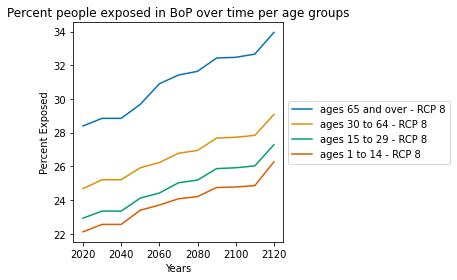

In [24]:
    plt.figure()
    sns.set_palette(sns.color_palette("colorblind"))
    plt.plot(year, rcp8_exp_ages_65_and_over, label="ages 65 and over - RCP 8")
    plt.plot(year, rcp8_exp_ages_30_to_64, label="ages 30 to 64 - RCP 8")
    plt.plot(year, rcp8_exp_ages_15_to_29, label="ages 15 to 29 - RCP 8")
    plt.plot(year, rcp8_exp_ages_1_to_14, label="ages 1 to 14 - RCP 8")
    
    
    
    
    plt.title('Percent people exposed in ' + rc_names[rc] + ' over time per age groups')
    plt.xlabel("Years")
    plt.ylabel("Percent Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    
plt.show()


131313
34125
34386
34386
34794
34845
35031
35172
35265
35265
35478
36432
36642
36642
36726
37083
37191
845421
153177
154986
156447
158886
160134
161238
162705
163470
166080
168135
170874
172290
174168
178572
181950
184710
349737
37812
38097
38544
39327
39615
39615
39693
40338
40758
40884
41796
42921
43752
44508
44622
44793
231195
58836
60078
61602
62847
64242
64665
66390
66468
66738
67539
69693
71058
73050
74838
76149
76926
28455
9750
9870
9921
9921
9921
9921
10059
10209
10509
10509
10689
10896
11124
11211
11397
11607
126951
17463
25392
25944
26865
32133
33207
34740
35658
36081
37827
39084
39648
40206
40821
41994
42270
100482
14211
14328
14328
14553
14553
14637
14757
14871
14871
14952
15231
15525
15525
15525
15570
15570
379758
28242
28905
29361
29964
30873
36471
37107
38649
40086
42534
45168
46794
47919
49878
51303
53223
497331
56817
61440
64680
67026
75681
80286
84606
87321
89316
93075
95598
98841
100422
104241
105480
107154
198729
19350
19584
19755
20517
20517
20796
20916
21045
31578

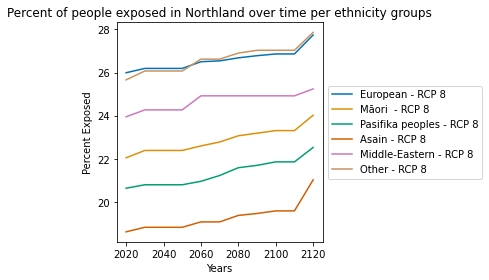

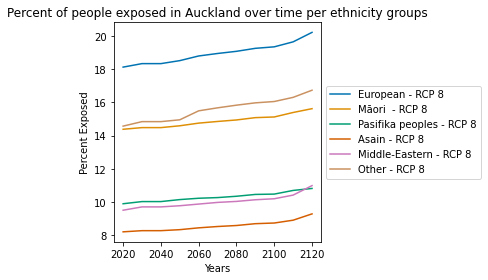

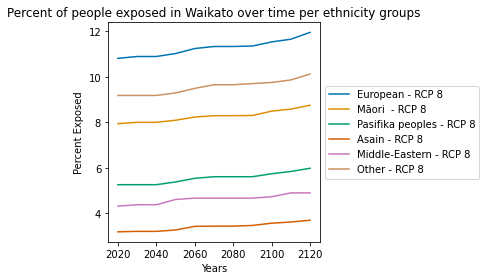

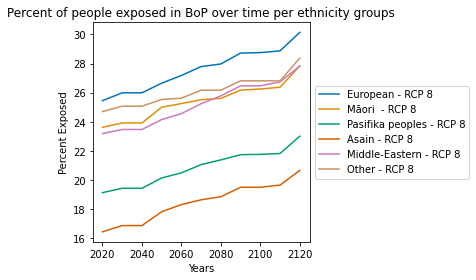

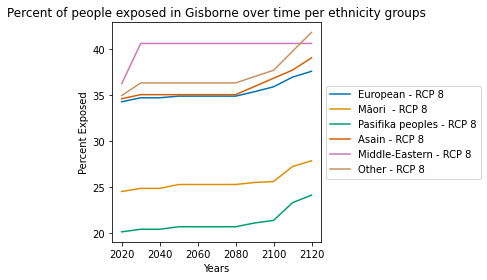

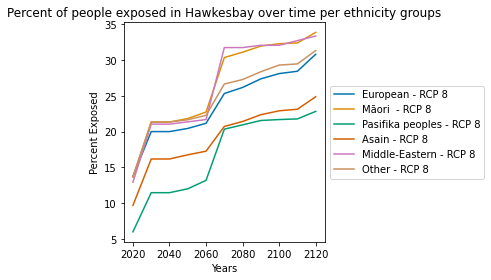

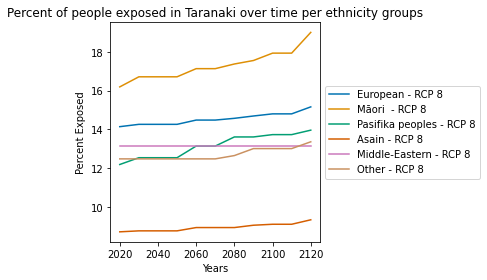

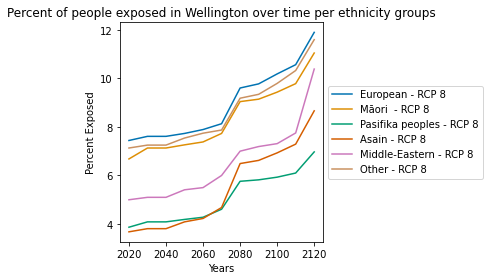

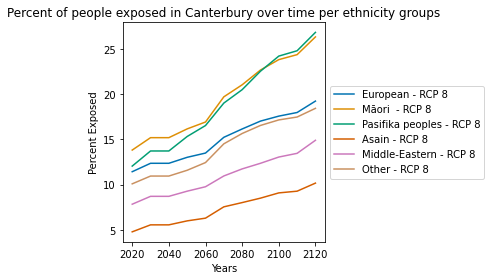

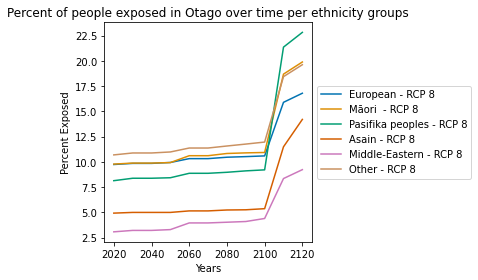

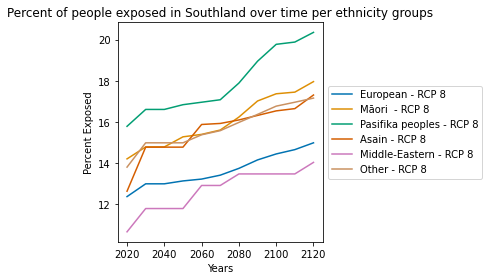

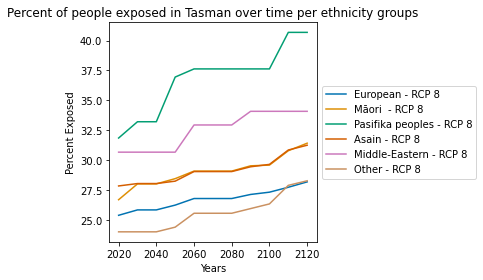

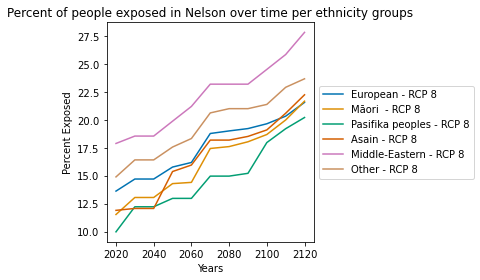

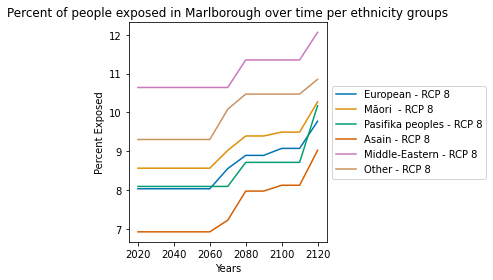

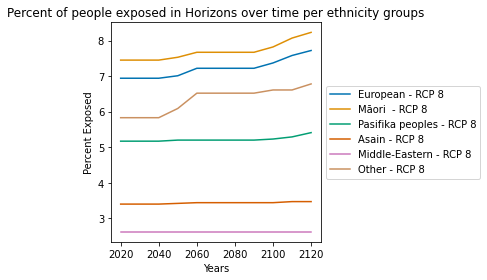

In [27]:

rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 


regional_tot_pop_list = [northland_total_pop, auckland_total_pop,waikato_total_pop, bop_total_pop, gisborne_total_pop, hawkesbay_total_pop, taranaki_total_pop ,wellington_total_pop, canterbury_total_pop, otago_total_pop,southland_total_pop,  tasman_total_pop, nelson_total_pop, marlborough_total_pop, horizons_total_pop]
for rc in range(0,15,1):
    tot_pop=regional_tot_pop_list[rc]
    tot_pop =tot_pop.replace(['C', -999, -998, '0', '..', 'Mainland'], 0)
    
    total_region_pop_european = tot_pop['C18_Ethnic'].sum()
    total_region_pop_Maori = tot_pop['C18_Ethn_1'].sum()
    total_region_pop_pacific_peoples = tot_pop['C18_Ethn_2'].sum()
    total_region_pop_asain = tot_pop['C18_Ethn_3'].sum()
    total_region_pop_Middle_Eastern = tot_pop['C18_Ethn_4'].sum()
    total_region_pop_Other = tot_pop['C18_Ethn_5'].sum()
    
    print(total_region_pop_european)
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    percent_exposed_european = []
    percent_exposed_Maori = []
    percent_exposed_pacific_peoples = []
    percent_exposed_asain = []
    percent_exposed_Middle_Eastern = []
    percent_exposed_Other = []
    
    for eslr in range(0,160,10):
            
        slr = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_l + '_aep1pct_{}.shp'.format(eslr))
        slr = slr.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
        
        pop_exposed_european = slr['C18_Ethnic'].sum()
        pop_exposed_Maori = slr['C18_Ethn_1'].sum()
        pop_exposed_pacific_peoples = slr['C18_Ethn_2'].sum()
        pop_exposed_asain = slr['C18_Ethn_3'].sum()
        pop_exposed_Middle_Eastern = slr['C18_Ethn_4'].sum()
        pop_exposed_Other = slr['C18_Ethn_5'].sum()
        
        print(pop_exposed_european)


        percent_exposed_to_slr_european = (pop_exposed_european/total_region_pop_european)*100
        percent_exposed_to_slr_european = round(percent_exposed_to_slr_european, 2)
        percent_exposed_european.append(percent_exposed_to_slr_european)
        
        percent_exposed_to_slr_Maori = (pop_exposed_Maori/total_region_pop_Maori)*100
        percent_exposed_to_slr_Maori = round(percent_exposed_to_slr_Maori, 2)
        percent_exposed_Maori.append(percent_exposed_to_slr_Maori)

        percent_exposed_to_slr_pacific_peoples = (pop_exposed_pacific_peoples/total_region_pop_pacific_peoples)*100
        percent_exposed_to_slr_pacific_peoples = round(percent_exposed_to_slr_pacific_peoples, 2)
        percent_exposed_pacific_peoples.append(percent_exposed_to_slr_pacific_peoples)
       
                       
        percent_exposed_to_slr_asain = (pop_exposed_asain/total_region_pop_asain) *100
        percent_exposed_to_slr_asain = round(percent_exposed_to_slr_asain, 2)
        percent_exposed_asain.append(percent_exposed_to_slr_asain)

        percent_exposed_to_slr_Middle_Eastern = (pop_exposed_Middle_Eastern/total_region_pop_Middle_Eastern)*100
        percent_exposed_to_slr_Middle_Eastern = round(percent_exposed_to_slr_Middle_Eastern, 2)
        percent_exposed_Middle_Eastern.append(percent_exposed_to_slr_Middle_Eastern)
        
        percent_exposed_to_slr_Other = (pop_exposed_Other/total_region_pop_Other)*100
        percent_exposed_to_slr_Other = round(percent_exposed_to_slr_Other, 2)
        percent_exposed_Other.append(percent_exposed_to_slr_Other)


    rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean= rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    
    rcp2_exp_european = []
    rcp8_exp_european = []
    rcp2_exp_Maori = []
    rcp8_exp_Maori = []
    rcp2_exp_pacific_peoples = []
    rcp8_exp_pacific_peoples = []
    rcp2_exp_asain = []
    rcp8_exp_asain = []
    rcp2_exp_Middle_Eastern = []
    rcp8_exp_Middle_Eastern = []
    rcp2_exp_Other = []
    rcp8_exp_Other = []


    for count in range(0,len(year)):
        rcp2_exp_european.append(percent_exposed_european[int(rcp2mean[count])])
        rcp8_exp_european.append(percent_exposed_european[int(rcp8mean[count])])
        rcp2_exp_Maori.append(percent_exposed_Maori[int(rcp2mean[count])])
        rcp8_exp_Maori.append(percent_exposed_Maori[int(rcp8mean[count])])
        rcp2_exp_pacific_peoples.append(percent_exposed_pacific_peoples[int(rcp2mean[count])])
        rcp8_exp_pacific_peoples.append(percent_exposed_pacific_peoples[int(rcp8mean[count])])
        rcp2_exp_asain.append(percent_exposed_asain[int(rcp2mean[count])])
        rcp8_exp_asain.append(percent_exposed_asain[int(rcp8mean[count])])
        rcp2_exp_Middle_Eastern.append(percent_exposed_Middle_Eastern[int(rcp2mean[count])])
        rcp8_exp_Middle_Eastern.append(percent_exposed_Middle_Eastern[int(rcp8mean[count])])
        rcp2_exp_Other.append(percent_exposed_Other[int(rcp2mean[count])])
        rcp8_exp_Other.append(percent_exposed_Other[int(rcp8mean[count])])
      

    data_rcp2 = {'European rcp 2':  rcp2_exp_european, 'Maori rcp 2': rcp2_exp_Maori, 'Pacific rcp 2':rcp2_exp_pacific_peoples, 'Asain rcp 2':rcp2_exp_asain, 'middle eastern  rcp 2':  rcp2_exp_Middle_Eastern, 'other rcp 2': rcp2_exp_Other,
                     'European rcp 8':  rcp8_exp_european, 'Maori rcp 8': rcp8_exp_Maori, 'pacific rcp 8':rcp8_exp_pacific_peoples, 'Asain rcp 8':rcp8_exp_asain, 'middle eastern  rcp 8':  rcp8_exp_Middle_Eastern, 'other rcp 8': rcp8_exp_Other}
    df= pd.DataFrame(data=data_rcp2)
    df.to_csv('result_tables/exposure table for ages in '+regional_name +'.pdf')

   
        
    plt.figure()
    sns.set_palette(sns.color_palette("colorblind"))
    plt.plot(year, rcp8_exp_european, label="European - RCP 8")
    plt.plot(year, rcp8_exp_Maori, label="Māori  - RCP 8")
    plt.plot(year, rcp8_exp_pacific_peoples, label="Pasifika peoples - RCP 8")
    plt.plot(year, rcp8_exp_asain, label="Asain - RCP 8")
    plt.plot(year, rcp8_exp_Middle_Eastern, label="Middle-Eastern - RCP 8")
    plt.plot(year, rcp8_exp_Other, label="Other - RCP 8")
  
  
    
    plt.title('Percent of people exposed in ' + rc_names[rc] + ' over time per ethnicity groups')
    plt.xlabel("Years")
    plt.ylabel("Percent Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('report/percent ethnicity of_ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()


In [ ]:
data_rcp2 = {'European rcp 2':  rcp2_exp_european, 'Maori rcp 2': rcp2_exp_Maori, 'Pacific rcp 2':rcp2_exp_pacific_peoples, 'Asain rcp 2':rcp2_exp_asain, 'middle eastern  rcp 2':  rcp2_exp_Middle_Eastern, 'other rcp 2': rcp2_exp_Other
                 'European rcp 8':  rcp8_exp_european, 'Maori rcp 8': rcp8_exp_Maori, 'pacific rcp 8':rcp8_exp_pacific_peoples, 'Asain rcp 8':rcp8_exp_asain, 'middle eastern  rcp 8':  rcp8_exp_Middle_Eastern, 'other rcp 8': rcp8_exp_Other}
df= pd.DataFrame(data=data_rcp2)
df.to_csv('result_tables/exposure table for ages in '+regional_name +'.pdf')


148416
35358
35685
35685
36078
36210
36483
36648
36774
36774
36981
37956
38268
38268
38541
38979
39090
908652
144417
145986
147273
149187
150297
151284
152631
153300
155805
157401
159633
160845
162345
166152
168702
170967
371811
36528
36783
37236
38001
38262
38262
38334
38982
39387
39504
40341
41505
42465
43134
43224
43380
251322
62649
63846
65808
66981
68205
68598
70338
70449
70737
71586
74040
76188
78201
79959
81156
81918
43854
12537
12696
12831
12831
12831
12831
12984
13137
13731
13731
14016
14343
14682
14811
15183
15825
140802
19155
28437
29049
30126
37281
38427
40041
40896
41286
42927
44238
44769
45297
45918
47028
47265
101292
14622
14811
14811
15066
15066
15189
15318
15471
15471
15588
15948
16233
16233
16233
16284
16284
367029
25005
25794
26268
26835
27816
33132
33666
35025
36315
38754
41022
42357
43449
45405
46740
48543
457497
51549
55935
59037
61344
69810
74145
78393
81171
83082
86679
89055
92085
93597
97212
98475
100023
176454
16941
17181
17328
18108
18108
18351
18462
18573
28

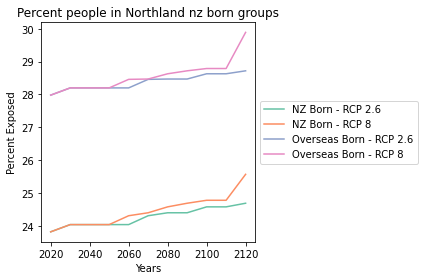

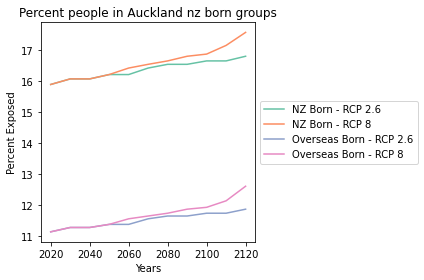

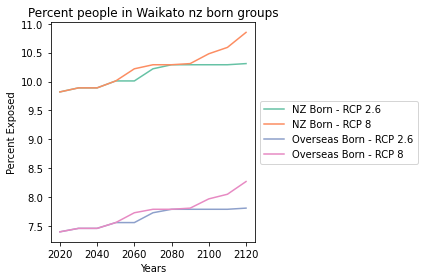

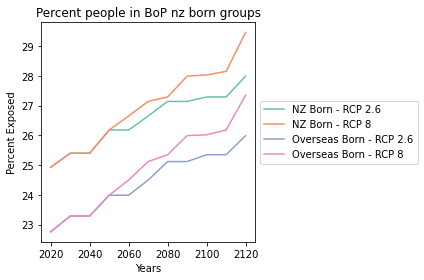

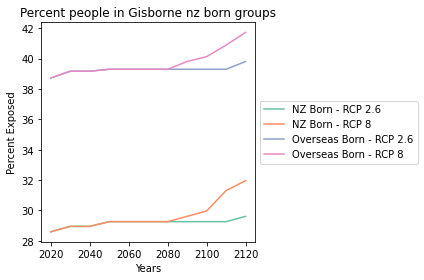

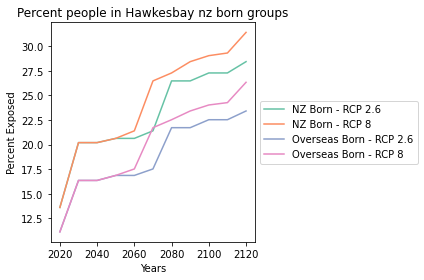

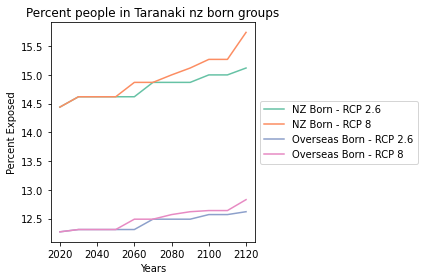

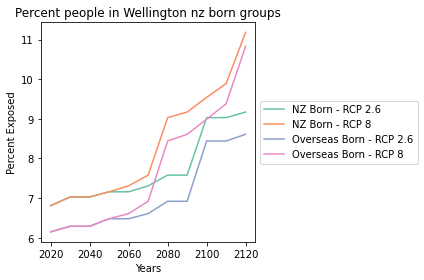

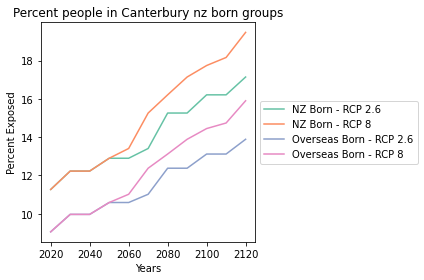

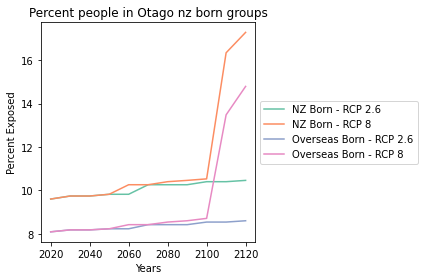

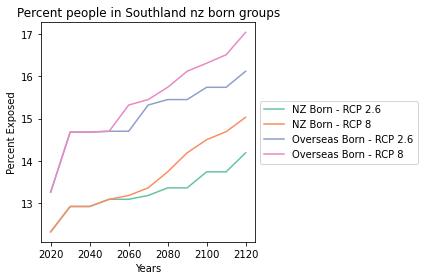

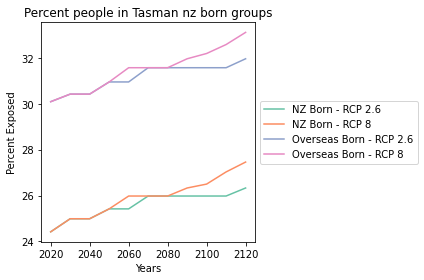

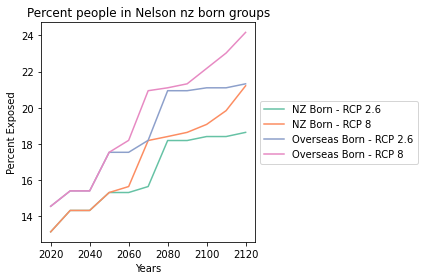

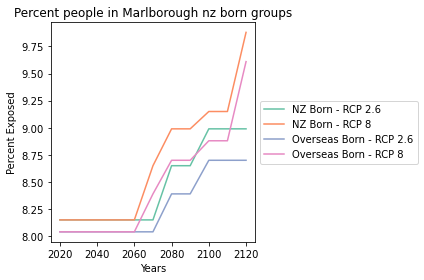

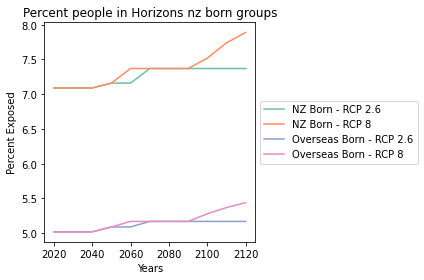

In [30]:

rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 


regional_tot_pop_list = [northland_total_pop, auckland_total_pop,waikato_total_pop, bop_total_pop, gisborne_total_pop, hawkesbay_total_pop, taranaki_total_pop ,wellington_total_pop, canterbury_total_pop, otago_total_pop,southland_total_pop,  tasman_total_pop, nelson_total_pop, marlborough_total_pop, horizons_total_pop]
for rc in range(0, len(regional_tot_pop_list)):
    tot_pop=regional_tot_pop_list[rc]
    tot_pop =tot_pop.replace(['C', -999, -998, '0', '..', 'Mainland'], 0)
    
    total_region_pop_nz_born = tot_pop['C18_Birthp'].sum()
    total_region_pop_overseas_born = tot_pop['C18_Birt_1'].sum()
    
    print(total_region_pop_nz_born)
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    percent_exposed_nz_born = []
    percent_exposed_overseas_born = []
    
    
    for eslr in range(0,160,10):
            
        slr = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_l + '_aep1pct_{}.shp'.format(eslr))
        slr = slr.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
        population_slr = slr['C18_CURPop'].sum()
        pop_exposed_nz_born = slr['C18_Birthp'].sum()
        pop_exposed_overseas_born = slr['C18_Birt_1'].sum()
        print(pop_exposed_nz_born)


        percent_exposed_to_slr_nz_born = (pop_exposed_nz_born/total_region_pop_nz_born)*100
        percent_exposed_to_slr_nz_born = round(percent_exposed_to_slr_nz_born, 2)
        percent_exposed_nz_born.append(percent_exposed_to_slr_nz_born)
        
        percent_exposed_to_slr_overseas_born = (pop_exposed_overseas_born/total_region_pop_overseas_born)*100
        percent_exposed_to_slr_overseas_born = round(percent_exposed_to_slr_overseas_born, 2)
        percent_exposed_overseas_born.append(percent_exposed_to_slr_overseas_born)


    rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean_14 = rcp2mean*10
    rcp2mean_15 = rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean_14 = rcp8mean*10
    rcp8mean_15 = rcp8mean*10
    rcp2_exp_nz_born = []
    rcp8_exp_nz_born = []
    rcp2_exp_overseas_born = []
    rcp8_exp_overseas_born = []



    for count in range(0,len(year)):
        rcp2_exp_nz_born.append(percent_exposed_nz_born[int(rcp2mean_14[count])])
        rcp8_exp_nz_born.append(percent_exposed_nz_born[int(rcp8mean_14[count])])
        rcp2_exp_overseas_born.append(percent_exposed_overseas_born[int(rcp2mean_15[count])])
        rcp8_exp_overseas_born.append(percent_exposed_overseas_born[int(rcp8mean_15[count])])
      

    exposure_table = {'nz born rcp 2':  rcp2_exp_nz_born, 'oe born rcp 2': rcp2_exp_overseas_born,'nz born rcp 8':  rcp8_exp_nz_born, 'oe born rcp 8': rcp8_exp_overseas_born}
    df= pd.DataFrame(data=exposure_table)
    df.to_csv('result_tables/exposure table for nz born in '+regional_name +'.csv')
    
        
    plt.figure()
    sns.set_palette(sns.color_palette("Set2"))
    plt.plot(year, rcp2_exp_nz_born, label="NZ Born - RCP 2.6")
    plt.plot(year, rcp8_exp_nz_born, label="NZ Born - RCP 8")
    plt.plot(year, rcp2_exp_overseas_born, label="Overseas Born - RCP 2.6")
    plt.plot(year, rcp8_exp_overseas_born, label="Overseas Born - RCP 8")
  
     
    plt.title('Percent people in ' + rc_names[rc] + ' nz born groups')
    plt.xlabel("Years")
    plt.ylabel("Percent Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('report/percent nz born of_ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()


In [ ]:

rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 


regional_tot_pop_list = [northland_total_pop, auckland_total_pop,waikato_total_pop, bop_total_pop, gisborne_total_pop, hawkesbay_total_pop, taranaki_total_pop ,wellington_total_pop, canterbury_total_pop, otago_total_pop,southland_total_pop,  tasman_total_pop, nelson_total_pop, marlborough_total_pop, horizons_total_pop]
for rc in range(0, len(regional_tot_pop_list)):
    tot_pop=regional_tot_pop_list[rc]
    tot_pop =tot_pop.replace(['C', -999, -998, '0', '..', 'Mainland'], 0)
    
    total_region_pop_maori = tot_pop['C18_Maori_'].sum()
    total_region_pop_no_maori = tot_pop['C18_Maor_1'].sum()
    
    print(total_region_pop_maori)
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    percent_exposed_maori = []
    percent_exposed_no_maori = []
    
    
    for eslr in range(0,160,10):
            
        slr = gpd.read_file('data/clipped_census/'+ regional_name + '/' + regional_name_l + '_aep1pct_{}.shp'.format(eslr))
        slr = slr.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
        population_slr = slr['C18_CURPop'].sum()
        pop_exposed_maori = slr['C18_Maori_'].sum()
        pop_exposed_no_maori = slr['C18_Maor_1'].sum()
        print(pop_exposed_maori)


        percent_exposed_to_slr_maori = (pop_exposed_maori/total_region_pop_maori)*100
        percent_exposed_to_slr_maori = round(percent_exposed_to_slr_maori, 2)
        percent_exposed_maori.append(percent_exposed_to_slr_maori)
        
        percent_exposed_to_slr_no_maori = (pop_exposed_no_maori/total_region_pop_no_maori)*100
        percent_exposed_to_slr_no_maori = round(percent_exposed_to_slr_no_maori, 2)
        percent_exposed_no_maori.append(percent_exposed_to_slr_no_maori)


    rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean_14 = rcp2mean*10
    rcp2mean_15 = rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean_14 = rcp8mean*10
    rcp8mean_15 = rcp8mean*10
    rcp2_exp_maori = []
    rcp8_exp_maori = []
    rcp2_exp_no_maori = []
    rcp8_exp_no_maori = []



    for count in range(0,len(year)):
        rcp2_exp_maori.append(percent_exposed_maori[int(rcp2mean_14[count])])
        rcp8_exp_maori.append(percent_exposed_maori[int(rcp8mean_14[count])])
        rcp2_exp_no_maori.append(percent_exposed_no_maori[int(rcp2mean_15[count])])
        rcp8_exp_no_maori.append(percent_exposed_no_maori[int(rcp8mean_15[count])])
      

    exposure_table = {'maori  rcp 2':  rcp2_exp_maori, 'no maori rcp 2': rcp2_exp_no_maori,'maori rcp 8':  rcp8_exp_maori, 'no maor in rcp 8': rcp8_exp_no_maori}
    df= pd.DataFrame(data=exposure_table)
    df.to_csv('result_tables/exposure table for Māori descent in '+regional_name +'.csv')
    
        
    plt.figure()
    sns.set_palette(sns.color_palette("Set3"))
    plt.plot(year, rcp2_exp_maori, label="Māori descent - RCP 2.6")
    plt.plot(year, rcp8_exp_maori, label="Māori descent - RCP 8")
    plt.plot(year, rcp2_exp_no_maori, label="No Māori descent - RCP 2.6")
    plt.plot(year, rcp8_exp_no_maori, label="No Māori descent - RCP 8")
  
    
    plt.title('Percent people in ' + rc_names[rc] + ' Māori descent groups')
    plt.xlabel("Years")
    plt.ylabel("Percent Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('report/percent Māori descent of_ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()
